This notebook is supposed to show in the simplest way, how neurons learn.

## Overhead (skip reading)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time

In [2]:
def create_plot():
    figure = plt.figure()
    gs = gridspec.GridSpec(2, 2)

    ax_model = figure.add_subplot(gs[0,0])
    ax_model.scatter(samples, targets, label='Samples')    
    ax_model.plot([0], [0], 'g', label='Learned model') #placeholder for the first pop
    ax_model.legend(loc='upper left', fontsize='small')
    ax_model.set_xlabel('Feature')
    ax_model.set_ylabel('Target')

    ax_loss_weight = figure.add_subplot(gs[0,1])
    ax_loss_weight.set_xlabel('Weight')
    ax_loss_weight.set_ylabel('Loss')
    text_weight = ax_loss_weight.text(1, 1, "weight={:>7.3f}".format(0), 
                             horizontalalignment='right', transform=ax.transAxes)

    ax_loss_step = figure.add_subplot(gs[1,:])
    ax_loss_step.set_xlabel('step')
    ax_loss_step.set_ylabel('Loss')
    text_loss = ax_loss_step.text(1, 0.4, "loss={:>7.3f}".format(0), 
                             horizontalalignment='right', transform=ax.transAxes)

    plt.tight_layout()
    return (figure, text_weight, text_loss)

def add_point_to_plot(ax, x, y):
    line = ax.lines[0]
    line.set_xdata(np.append(line.get_xdata(), x))
    line.set_ydata(np.append(line.get_ydata(), y))
    
def update_plot(figure, text_weight, text_loss,
                samples, weight, loss, step):
    
    ax_model = figure.axes[0]
    ax_loss_weight = figure.axes[1]
    ax_loss_step = figure.axes[2]
    
    ax_model.lines.remove(ax_model.lines[0])
    ax_model.plot(samples, samples * weight,'g' , label='Learned model')

    ax_loss_weight.plot(weight, loss,'r-*', markersize=3)
    add_point_to_plot(ax_loss_weight, weight, loss)
    text_weight.set_text("weight={:>7.3f}".format(weight))

    ax_loss_step.plot(step, loss, 'r-*', markersize=3)
    add_point_to_plot(ax_loss_step, step, loss)
    text_loss.set_text("loss={:>7.3f}".format(loss))
    figure.canvas.draw()
    time.sleep(0.005)
    return

# Single linear neuron

## Single feature

### Generate data

<IPython.core.display.Javascript object>


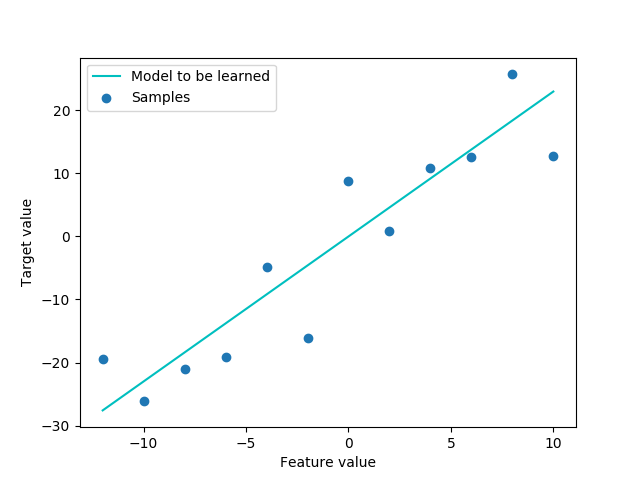

In [3]:
num_samples = 12
samples = np.linspace(-12, 10, num=num_samples)
# pick a weight to be learned
target_weight = 2.3
# generate data
targets = samples * target_weight
# add noise
np.random.seed(1)
targets += np.random.randn(len(samples)) * 5

#plot data
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Feature value')
ax.set_ylabel('Target value')
ax.scatter(samples, targets, label='Samples')
ax.plot(samples, samples * target_weight,'c', label='Model to be learned')
ax.legend(loc='upper left')
fig.canvas.draw()


### Learn weights - full batch learning

<IPython.core.display.Javascript object>


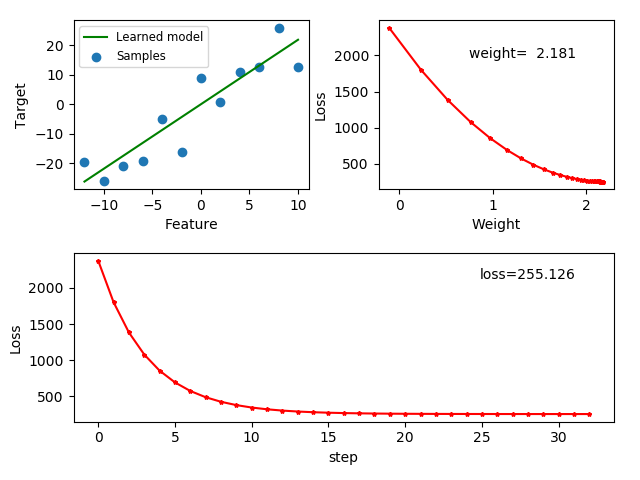

In [4]:
# HYPER PARAMETERS
learnrate = 0.001
steps = 100

# WEIGHT INTIALIZATION
weight = -0.5 #np.random.rand(1)[0]

fig, text_weight, text_loss = create_plot()

# TRAINING
for step in range(steps):
    z = weight * samples
    errors = targets - z
    delta = learnrate / len(samples) * np.dot(errors, samples)
    weight += delta
    loss = 0.5*np.dot(errors, errors)

    if abs(delta) < abs(0.001 * weight):
        break
    
    update_plot(fig, text_weight, text_loss,
                samples, weight, loss, step)

### Learn weights - online learning

<IPython.core.display.Javascript object>


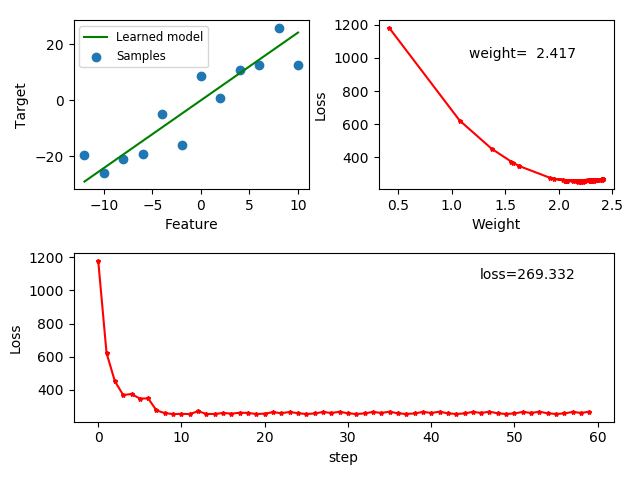

In [5]:
# HYPER PARAMETERS
learnrate = 0.001
rounds = 10

# WEIGHT INTIALIZATION
weight = -0.5 #np.random.rand(1)[0]

fig, text_weight, text_loss = create_plot()

# TRAINING
step = 0
for e in range(rounds):
    for x, t in zip(samples, targets):
        z = weight * x
        error = t - z
        delta = learnrate * error * x
        weight += delta
        errors = targets - weight * samples
        loss = 0.5*np.dot(errors, errors)

        if abs(delta) < abs(0.001 * weight):
            break

        update_plot(fig, text_weight, text_loss,
                    samples, weight, loss, step)
        step += 1

### Learn weights - mini batch learning

<IPython.core.display.Javascript object>


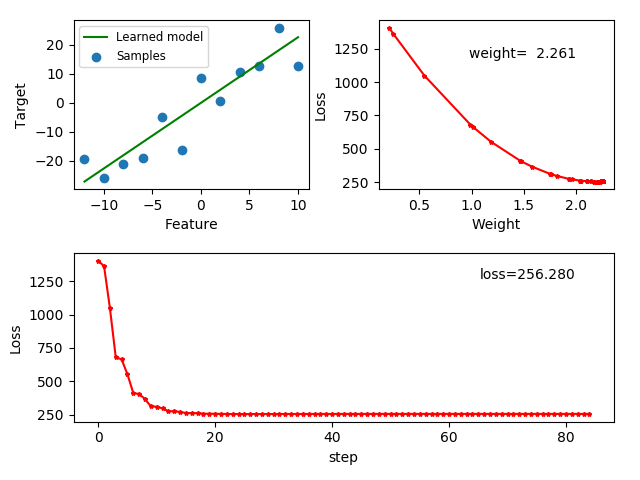

In [6]:
# HYPER PARAMETERS
learnrate = 0.001
rounds = 60
batch_size = 4

# WEIGHT INTIALIZATION
weight = -0.5 #np.random.rand(1)[0]

fig, text_weight, text_loss = create_plot()

# TRAINING
step = 0
for _ in range(rounds):
    for b in range(num_samples // batch_size):
        batch_samples = samples[b*batch_size:(b+1)*batch_size]
        batch_targets = targets[b*batch_size:(b+1)*batch_size]
        z = weight * batch_samples
        batch_errors = batch_targets - weight * batch_samples
        delta = learnrate / len(batch_samples) * np.dot(batch_errors, batch_samples)
        weight += delta
        errors = targets - weight * samples
        loss = 0.5*np.dot(errors, errors)
         
        update_plot(fig, text_weight, text_loss,
                    samples, weight, loss, step)
        step += 1
        if abs(delta) < abs(0.001 * weight):
            break